## Effective Heart Disease Prediction Using Machine Learning

In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ECG report,FH,FD,alcohol,smoking,MT,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1,1,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,1,1,1,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,1,1,1,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1,1,1,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0,0,0,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,0,0,0,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0,0,0,0,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   cp          303 non-null    int64  
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalach     303 non-null    int64  
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          303 non-null    int64  
 12  thal        303 non-null    int64  
 13  ECG report  303 non-null    int64  
 14  FH          303 non-null    int64  
 15  FD          303 non-null    int64  
 16  alcohol     303 non-null    int64  
 17  smoking     303 non-null    int64  
 18  MT          303 non-null    int64  
 19  target      303 non-null    i

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ECG report,FH,FD,alcohol,smoking,MT,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.544554,0.544554,0.544554,0.544554,0.544554,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.498835,0.498835,0.498835,0.498835,0.498835,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'ECG report', 'FH', 'FD',
       'alcohol', 'smoking ', 'MT', 'target'],
      dtype='object')

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ECG report,FH,FD,alcohol,smoking,MT,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1,1,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,1,1,1,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,1,1,1,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1,1,1,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0,0,0,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,0,0,0,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0,0,0,0,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,0,0,0,0,0


In [9]:
df.size

6060

In [10]:
df.shape

(303, 20)

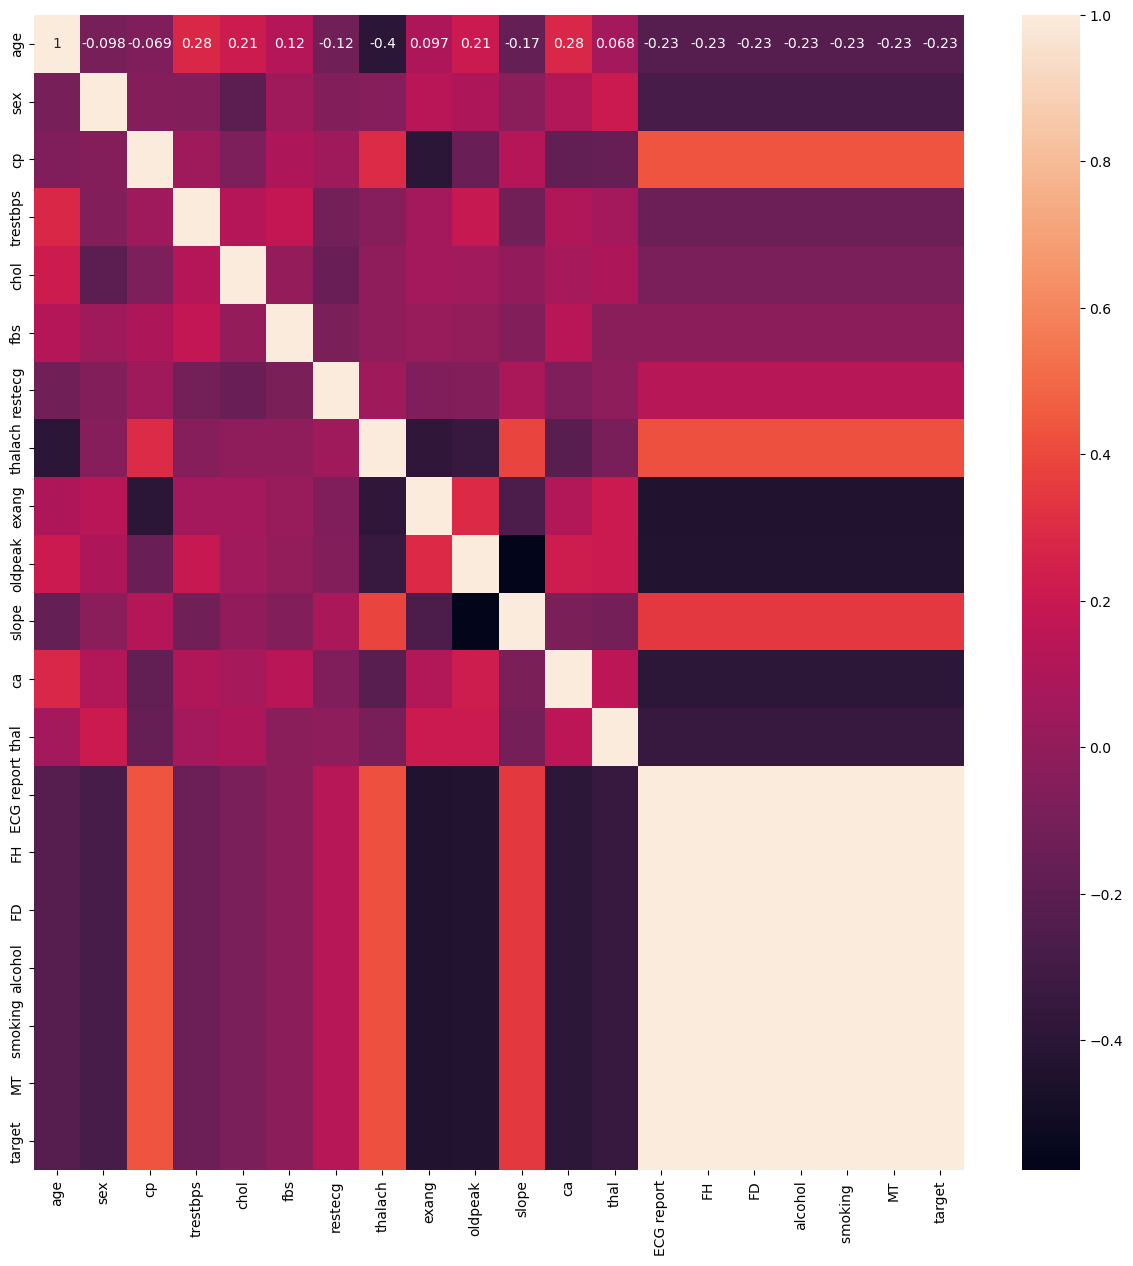

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: >

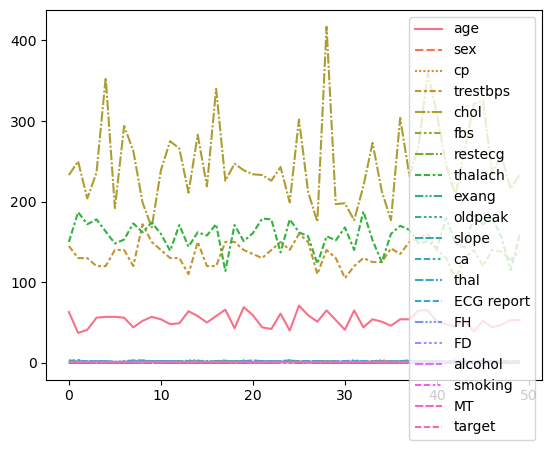

In [12]:
sns.lineplot(data=df.head(50))

<Axes: xlabel='ECG report', ylabel='target'>

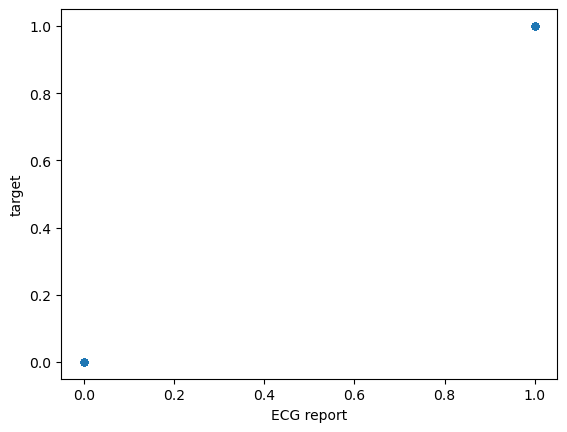

In [13]:
df.plot(kind="scatter", x="ECG report", y="target")

In [14]:
X = df.drop(['target'], axis=1)
Y = df['target']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(242, 19) (61, 19) (242,) (61,)


In [16]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
xgb_r.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [17]:
xgb_r.score(X_train, Y_train)

0.9991429091581012

In [18]:
# import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)
# split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.20,
                                       random_state=23)
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
 
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 96.49122807017544
